# <font color='orange'>TME Intro à l'IA</font>
# <font color='orange'>1. Apprentissage supervisé</font>

# <font color="green">M1, 2024-2025</font>
# <font color="green">**VERSION ETUDIANT·ES**</font>

*Teacher: nicolas.bredeche(at)sorbonne-universite.fr*

*Last update: 3/12/2025*

Ce notebook fonctionne directement avec Google Colab et Jupyterlab. Nous vous conseillons d'utiliser Google Colab.

Aide: pour utiliser ce notebook, vous devez exécuter chacun des cellules les unes après les autres. En effet, certaines cellules définissent et construisent des éléments qui sont utiles par la suite. En cas de (gros) problème, vous pouvez redémarrer le noyau, et ré-exécuter les cellules une par une en partant de la première.

Les deux premières cellules, à exécuter avant de commencer, permettent de:

1.   charger les librairies utiles pour le TP
2.   charger un premier jeu de données qui sera utilisé par la suite

Les cellules suivantes contiennent parfois du code pour vous aider à commencer un exercice.

Vous devez répondre dans la cellule qui correspond à la question (ne créez pas de nouvelle cellule SVP), y compris quand il faut faire une réponse en langage naturelle (mettez vos réponses en commentaire Python).

Pour répondre aux questions, vous devez vous référer au cours disponible sur Moodle.

Astuce: *dans une cellule, le raccourci clavier shift+entrée permet d'exécuter la cellule courante.*



---





# Import des librairies nécessaires


*   Matplotlib: permet d'afficher des figures. Seaborn offre des options de rendu avancée.
*   numpy et panda: permettent de manipuler des structures de données
*   sklearn (scikit-learn): permet d'utiliser divers algorithmes d'apprentissage



In [1]:
import os
from datetime import datetime
from datetime import date

import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import KFold
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures

import seaborn as sns

sns.set_theme()

print(
    date.today(), datetime.now().strftime("%H:%M:%S"), "GMT"
)  # timestamp is greenwich time
print("OK.")

2025-12-05 16:02:33 GMT
OK.


---

# Chargement et affichage d'une base de données

Cette base de données décrit le lien entre descripteurs (age, sexe, etc.) et diagnostic de diabète chez une cohorte d'individus.

Nous allons détourner cette base de données pour étudier uniquement la relation entre l'âge et la tension artérielle (systolique).

Etudiez ce code. Il illustre comment manipuler et accéder à une base de données, et comment afficher un graphique qui permet de visualiser le rapport entre l'âge et la tension artérielle.

Remarque: *vous remarquerez que les données ont été préparées. Elles sont centrées en zéro et redimensionnées. C'est une pratique courante en apprentissage automatique.*

Biblio: Les données utilisées se trouvent sur scikit-learn: https://scikit-learn.org/stable (il n'est pas utile de consulter cette page pour le TP)

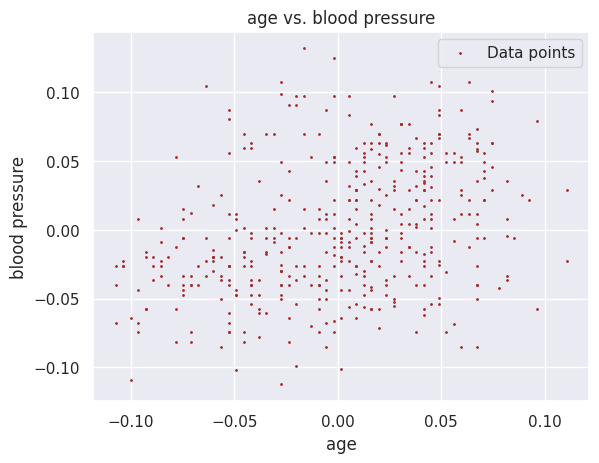

In [2]:
# Base de données normalisées contenant une description de quelques centaines de patients diabétiques
# lien vers la base originelle: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# article référence: http://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf

diabetes = datasets.load_diabetes()  # note that values have been centered and scaled
# print (diabetes['feature_names'])
diabetes_data = pd.DataFrame(data=diabetes["data"], columns=diabetes["feature_names"])

# X est un vecteur contenant les descripteurs (ici: l'age uniquement)
X = diabetes_data["age"]
y = diabetes_data["bp"]  # Y est un vecteur contenant les étiquettes

plt.scatter(X, y, label="Data points", color="brown", s=1)
plt.title("age vs. blood pressure")
plt.xlabel("age")
plt.ylabel("blood pressure")
plt.legend()
plt.show()

---
# Régression linéaire à la main

Dans cet exercice, vous devez trouver *à la main* les paramètres d'une fonction affine qui capture au mieux le rapport entre l'âge et la pression artérielle. Vous trouverez les slides du cours sur Moodle pour vous aider.



1.   écrivez une fonction qui prend en paramètre *X*, *theta_0* et *theta_1*, et qui renvoie la valeur de theta_0 + theta_1 * x pour chaque élément de *X*. *X* est un vecteur (cf. Section précédente), il faut donc renvoyer un nouveau vecteur de même taille.
  * Pour tester votre fonction, affichez le résultat de son appel sur le vecteur X initialisé précédemment.


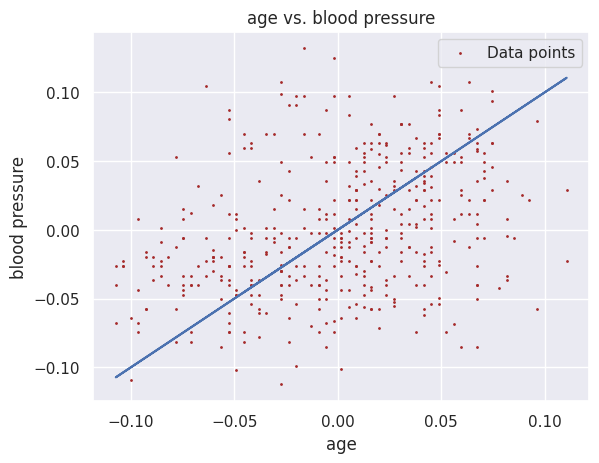

In [3]:
def h(X, theta_0, theta_1):
    return np.array(theta_0 + X * theta_1)


plt.scatter(X, y, label="Data points", color="brown", s=1)
plt.plot(X, h(X, 0, 1))
plt.title("age vs. blood pressure")
plt.xlabel("age")
plt.ylabel("blood pressure")
plt.legend()
plt.show()

2.   écrivez une fonction qui calcule la perte pour une fonction hypothèse. Cette fonction calcule la perte et prend en paramètres:
*   (a) un ensemble d'exemples (*X*) et des labels associés (*y*). Cf. Section précédente pour voir le contenu et la structure de X et y.
*   (b) les paramètres d'une fonction hypothèse (theta_1 et theta_2), à utiliser avec la fonction *h* précédemment écrite.
* Pour tester votre fonction, affichez le résultat de son appel sur le vecteur X initialisé précédemment en utilisant la fonction *h* de la question précédente. choisissez *theta_0*=1 et *theta_1*=1 (il s'agit d'un test! Vous devriez obtenir une loss de 0.5015...).

In [4]:
def loss(X, y, theta_0, theta_1):
    return sum((h(X, theta_0, theta_1) - y) ** 2) / (2 * len(X))


print(round(loss(X, y, 1, 1), 4))

0.5015


3.   cherchez *à la main* pendant *5 minutes maximum* les valeurs theta_0 et theta_1 tel que la fonction de perte renvoie une erreur minimale pour prédire la pression artérielle en fonction de l'âge sur la base précédemment chargée ("diabetes"). Tracez le résultat sur un graphe ou vous projeterez aussi les données brutes.


Best hypothesis: h(x) = 0 +  0.4 * x


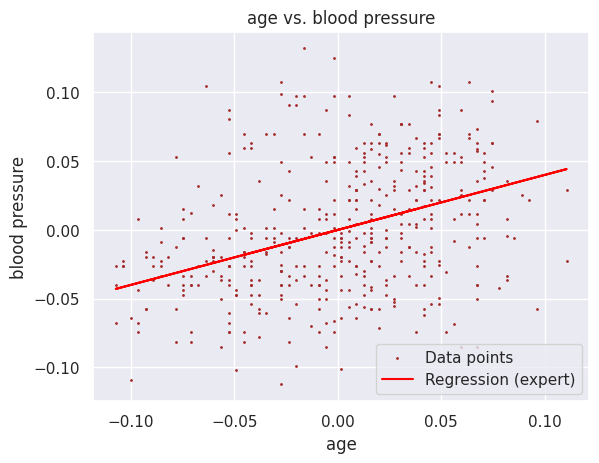

loss(Theta) = 0.10%


In [5]:
# Assume that the expert provides a good guess for the hypothesis and it looks like a straight line (i.e. expert guess)

theta_0_opt = 0
theta_1_opt = 0.4

print("Best hypothesis: h(x) =", theta_0_opt, "+ ", theta_1_opt, "* x")

plt.scatter(X, y, label="Data points", color="brown", s=1)
y_approx = h(X, theta_0_opt, theta_1_opt)
plt.plot(X, y_approx, label="Regression (expert)", color="red")
plt.title("age vs. blood pressure")
plt.xlabel("age")
plt.ylabel("blood pressure")
plt.legend()
plt.show()

print(f"loss(Theta) = {loss(X, y, theta_0_opt, theta_1_opt):.2%}")

---

# Influence des paramètres de la fonction linéaire sur la performance

Vous allez maintenant étudier l'influence des valeurs de *theta_0* et *theta_1* sur la qualité des fonctions hypothèses que l'on peut obtenir. Pour cela, vous allez tracer le comportement d'une fonction hypothèse dont on fixe la valeur de *theta_0*, et dont on fait varier la valeur de *theta_1* sur une plage de valeur.

Vous allez donc tracer sur une figure la perte en fonction de la valeur de *theta_1*. Ceci va nous permettre de manière simple de visualiser le gradient d'une fonction particulière sur une dimension (theta_1). On s'attend à une courbe ressemblant à une fonction sphère (i.e. convexe, unimodale, ressemblant à un "U") dont le point le plus bas donne la valeur optimale de theta_1 étant donné theta_0 fixé.



1.   calculer la perte de la fonction h(x) avec *theta_0* fixé à 0, en faisant varier *theta_1* de -100 à 100, par pas de 0.1. Tracez cette fonction et affichez la valeur de *theta_1* qui permet de minimiser la perte (que vous afficherez aussi).


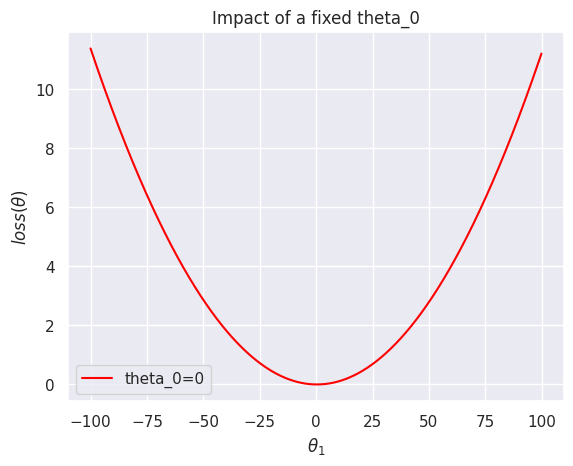

In [6]:
def theta_0_impact(theta_0_fixed=0):
    theta_1 = np.arange(-100, 100, 0.1)
    loss1 = []

    for t1 in theta_1:
        loss1.append(loss(X, y, theta_0_fixed, t1))

    plt.title("Impact of a fixed theta_0")
    plt.plot(theta_1, loss1, label="theta_0=%s" % theta_0_fixed, color="red")
    plt.legend()
    plt.xlabel(r"$\theta_1$")
    plt.ylabel(r"$loss(\theta)$")
    plt.show()


theta_0_impact(0)

2.   idem en fixant *theta_0* à 2.


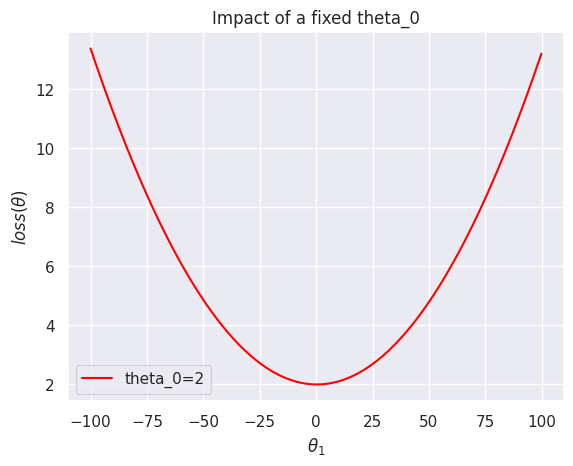

In [7]:
theta_0_impact(2)

3.   idem en fixant *theta_0* à la valeur que vous aviez trouvée lors de votre recherche à la main.


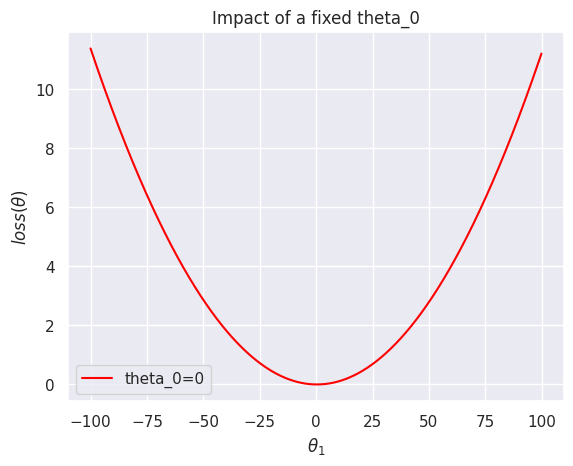

In [8]:
theta_0_impact(theta_0_opt)

---

# Algorithme de régression linéaire pour l'apprentissage supervisé

Dans cet exercice, vous allez implémenter l'algorithme de regression linéaire, en utilisant un modèle de la forme *y = ax +b*. Vous ne devez pas utiliser de librairies externes, seulement du code Python simple (et numpy).

Vous testerez votre algorithme sur les mêmes données que précédemment. L'objectif est de comparer la solution obtenue par apprentissage avec la solution proposée précédemment par l'expert.


1.   En vous référant au cours, implémentez la regression linéaire et entrainez votre algorithme sur les données précédemment utilisées. Suggestion pour commencer: initialisez les paramètres d'apprentissage *theta_1* et *theta_2* à zéro, *alpha* à 0.1 et fixez le nombre d'itérations à 20000. Vous afficherez la valeur de la fonction de perte toutes les 1000 itérations.


In [9]:
def regression(X=X, y=y, alpha = 0.1, iterations=20000):  
    theta_0 = 0  # initial value for theta_0
    theta_1 = 0  # initial value for theta_1
    theta_0_new, theta_1_new = 0, 0

    for _ in range(iterations):
        m = len(X)
        h_minus_y = h(X, theta_0, theta_1) - y # Reduit le temps de calcul de plusieurs secondes
        theta_0_new -= alpha / m * sum(h_minus_y)
        theta_1_new -= alpha / m * sum(h_minus_y * X)
        # theta_0_new, theta_1_new sont la pour mettre a jour les theta simultanément
        theta_0, theta_1 = theta_0_new, theta_1_new

    return theta_0, theta_1

theta_0, theta_1 = regression()
print("SUMMARY:")
print(
    f"h(x) = {theta_0}+{theta_1}*x with loss on learning dataset: {loss(X, y, theta_0, theta_1):.2%}"
)

SUMMARY:
h(x) = -4.7150778133453163e-17+0.3317947740748058*x with loss on learning dataset: 0.10%


2.   Tracer la fonction hypothèse obtenue et comparez le résultat avec celui donnez par la solution précédemment proposée par l'expert (à tracer sur la même figure).


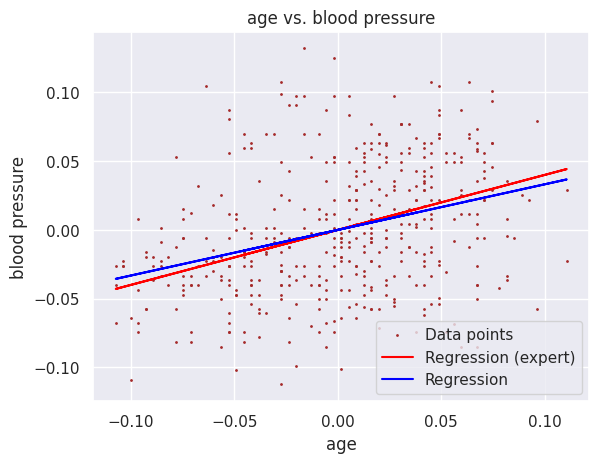

In [10]:
plt.scatter(X, y, label="Data points", color="brown", s=1)
y_approx_expert = h(X, theta_0_opt, theta_1_opt)
y_approx = h(X, theta_0, theta_1)
plt.plot(X, y_approx_expert, label="Regression (expert)", color="red")
plt.plot(X, y_approx, label="Regression", color="blue")
plt.title("age vs. blood pressure")
plt.xlabel("age")
plt.ylabel("blood pressure")
plt.legend()
plt.show()

3.   Etudiez l'influence du taux d'apprentissage et du nombre d'itérations. Qu'observez vous?

Pour alpha = 0.001 et iteration = 1000, loss = 0.11306471%
Pour alpha = 0.001 et iteration = 20000, loss = 0.11202094%
Pour alpha = 0.001 et iteration = 30000, loss = 0.11150658%


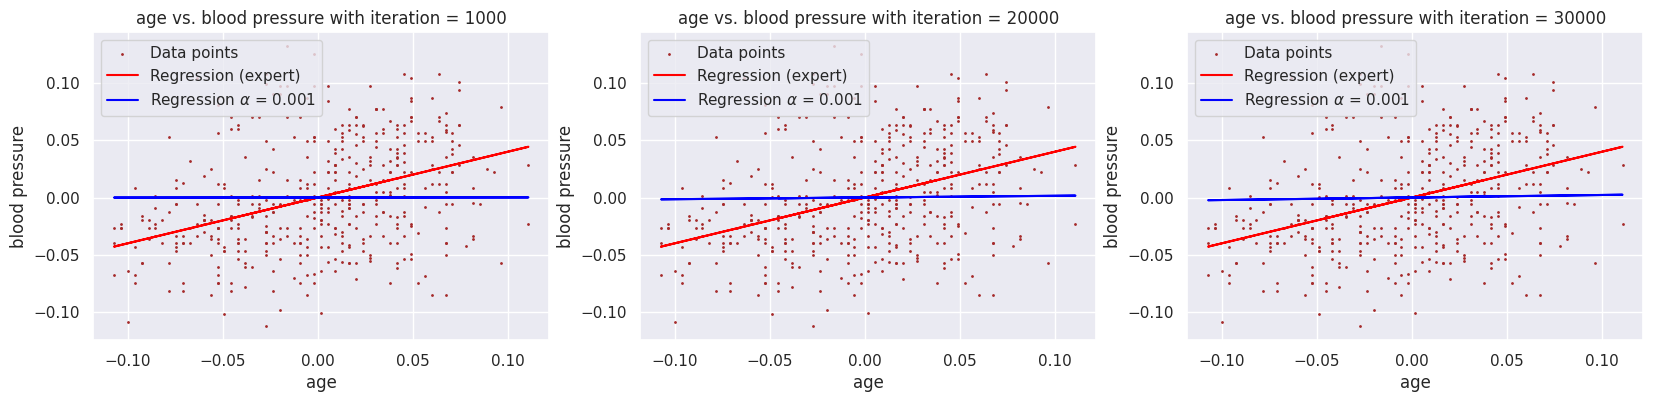

Pour alpha = 0.05 et iteration = 1000, loss = 0.11054501%
Pour alpha = 0.05 et iteration = 20000, loss = 0.10053249%
Pour alpha = 0.05 et iteration = 30000, loss = 0.10040896%


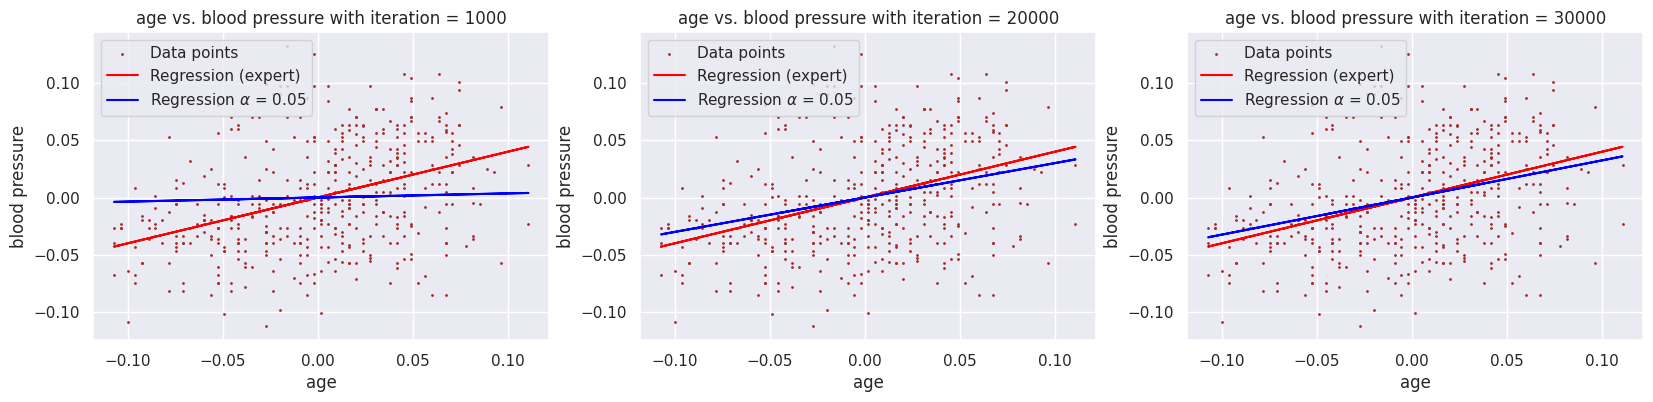

Pour alpha = 0.1 et iteration = 1000, loss = 0.10848947%
Pour alpha = 0.1 et iteration = 20000, loss = 0.10039610%
Pour alpha = 0.1 et iteration = 30000, loss = 0.10039462%


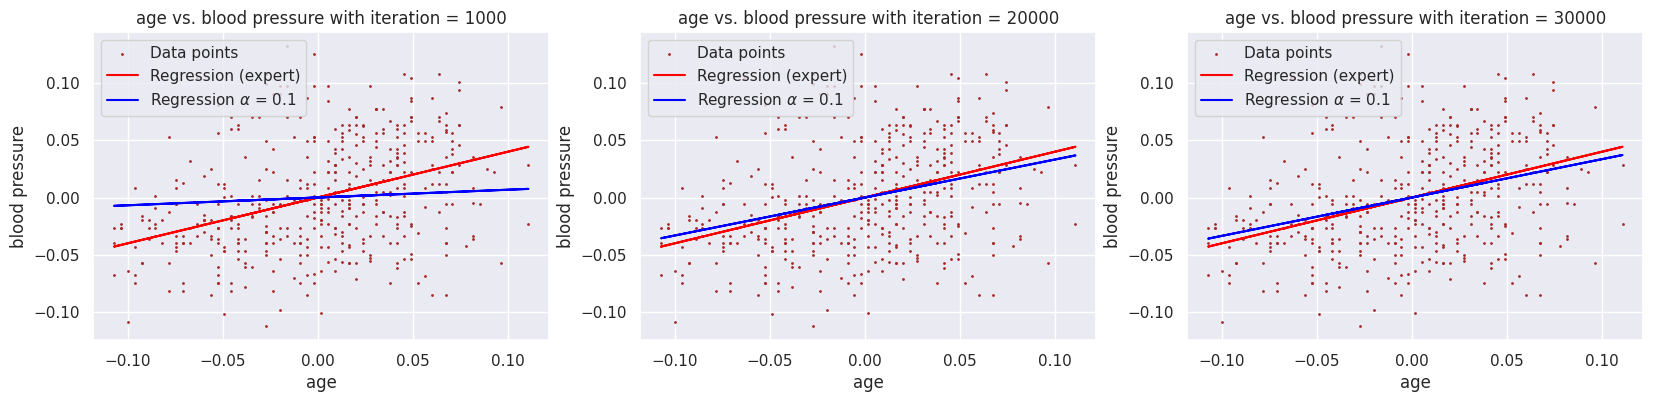

Pour alpha = 1 et iteration = 1000, loss = 0.10053182%
Pour alpha = 1 et iteration = 20000, loss = 0.10039461%
Pour alpha = 1 et iteration = 30000, loss = 0.10039461%


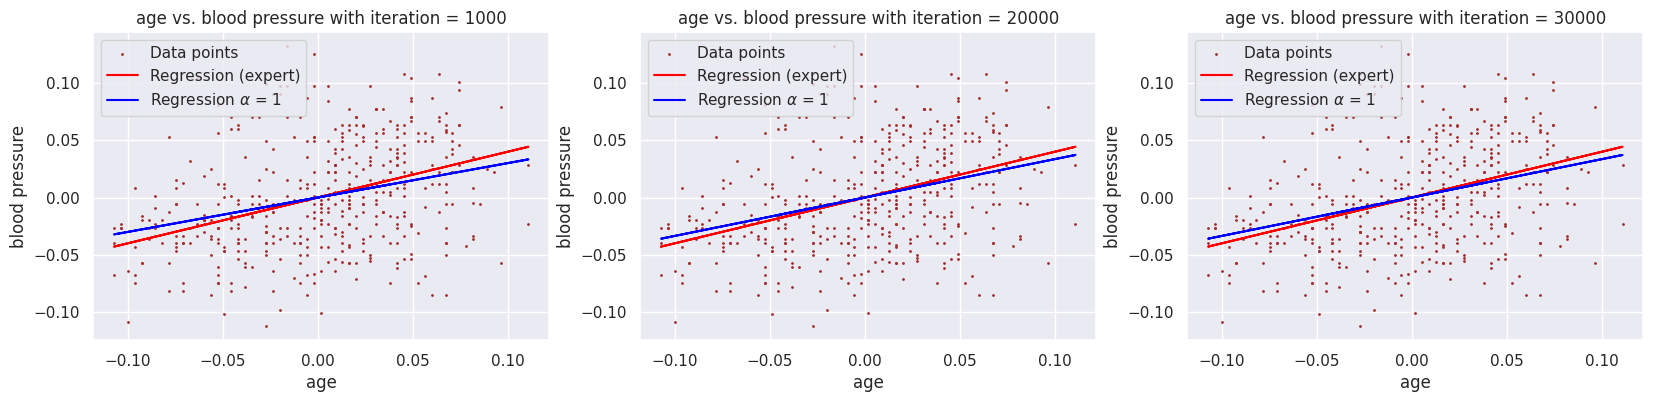

In [11]:
alphas = [0.001, 0.05, 0.1, 1]
iterations = [1000, 20000, 30000]

y_approx_expert = h(X, theta_0_opt, theta_1_opt)
for alpha in alphas:
    plt.figure(figsize=(20, 4))
    for i, iteration in enumerate(iterations):
        plt.subplot(1, len(iterations), i+1)

        theta_0, theta_1 = regression(alpha=alpha, iterations=iteration)
        y_approx = h(X, theta_0, theta_1)

        plt.scatter(X, y, label="Data points", color="brown", s=1)
        plt.plot(X, y_approx_expert, label="Regression (expert)", color="red")
        plt.plot(X, y_approx, label= r"Regression $\alpha$ = " + str(alpha), color="blue")
        plt.title(f"age vs. blood pressure with {iteration = }")
        plt.xlabel("age")
        plt.ylabel("blood pressure")
        plt.legend()
        print(f"Pour {alpha = } et {iteration = }, loss = {loss(X, y, theta_0, theta_1):.8%}")
    plt.show()

Le taux d'apprentissage influence la vitesse de convergence de l'algorithme. Si le nombre d'itérations est trop faible, l'algorithme n'a pas le temps de converger vers une solution optimale. En augmentant le nombre d'itérations, on permet à l'algorithme de mieux ajuster les paramètres mais on augmente aussi le temps de calcul. 



---
S'il vous reste du temps: implémentez une validation croisée avec k = 10.

In [12]:
k = 10
kf = KFold(n_splits=k)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    
    theta_0, theta_1 = regression(X=X_train_fold, y=y_train_fold)
    print(f"Fold {i+1}\t : loss = {loss(X, y, theta_0, theta_1)}")

Fold 1	 : loss = 0.00100430202238879
Fold 2	 : loss = 0.0010044029430452846
Fold 3	 : loss = 0.0010039689641948334
Fold 4	 : loss = 0.0010040845510431251
Fold 5	 : loss = 0.0010045483357061847
Fold 6	 : loss = 0.0010039781758745198
Fold 7	 : loss = 0.0010042070114592494
Fold 8	 : loss = 0.0010041467646446983
Fold 9	 : loss = 0.0010042579125350444
Fold 10	 : loss = 0.0010041541963513117
